# Avaliacão Módulo II

Faca um programa que:
1) Carregue os dados de um csv remoto, ex. csv do github, csv de uma base aberta qualquer ou API.  
2) Crie uma api que filtre esses dados e retorne o json dos dados filtrados.  
3) A partir dos dados filtrados você deve escolher uma variável quantitativa para agregar com um groupby e criar um csv e um json resposta, ambos devem ser persistidos.  
4) A partir dos dados filtrados você deve escolher um gráfico para fazer como por exemplo fizemos as gorgetas dadas por sexo ou dia da semana. Crie uma figura png ou jpeg resposta.  
5) Coloque sua resposta em um projeto novo no git e envie por e-mail.  
  
Entregar até 29/11.

## API - Parte I e II


#### Parte I - Importação CSV - Dentro da API
#### Dados de nascimentos nos EUA de 2000 a 2014
url = 'https://raw.githubusercontent.com/rudeboybert/fivethirtyeight/master/data-raw/births/US_births_2000-2014_SSA.csv'
df = pd.read_csv(url)

#### Parte II - API Filtro - Dentro da API
#### Filtrando para apenas os dados de 2000 e mês de dezembro
df= df[df.year == 2000 ]
df.drop(columns=['year'], inplace = True)
df.rename(columns = {'month':'Mês', 'date_of_month':'Dia do mês', 'births':'Nascimentos'}, inplace = True)
df

##### As partes descritas aqui foram inseridas na API


In [1]:
%%writefile apipandas.py
#API com Flask
from flask import Flask, request
from flask_restful import Resource, Api
import pandas as pd

app = Flask(__name__)
api = Api(app)

#Pegar uma url e filtrar os dados
#Parte I
url = 'https://raw.githubusercontent.com/rudeboybert/fivethirtyeight/master/data-raw/births/US_births_2000-2014_SSA.csv'
df = pd.read_csv(url)
#Parte II
df= df[df.year == 2000 ]
df.drop(columns=['year','day_of_week'], inplace = True)
df.rename(columns = {'month':'Mês', 'date_of_month':'Dia do mês', 'births':'Nascimentos'}, inplace = True)

class Dados(Resource):
    def get(self):
        return df.to_json()
    
api.add_resource(Dados, '/dados')

if __name__ == '__main__':
    app.run(debug=True)

Writing apipandas.py


In [ ]:
#cmd
#python3 apipandas.py

# Código Pós-API - Partes III, IV e V

In [2]:
#Todas as dependências
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns
import requests

#Requisitar os dados da API
response = requests.get('http://127.0.0.1:5000/dados')
json_df = response.json()
df = pd.read_json(json_df)
df

,Mês,Dia do mês,Nascimentos
0,1,1,9083
1,1,2,8006
2,1,3,11363
3,1,4,13032
4,1,5,12558
...,...,...,...
361,12,27,13252
362,12,28,13900
363,12,29,13607
364,12,30,9405


#### Parte III


In [3]:
#Faz um groupy por mês e retorna o somatório de nascimentos por mês
nascimentoMesJson = df.groupby(['Mês'])['Nascimentos'].sum()
#Converte em um Json
NMJ = nascimentoMesJson.to_json(orient="split")
#Persiste o JSON em um arquivo
with open('NascimentoMes.json', 'w') as json_file:
    json.dump(NMJ, json_file)    

#### Parte IV

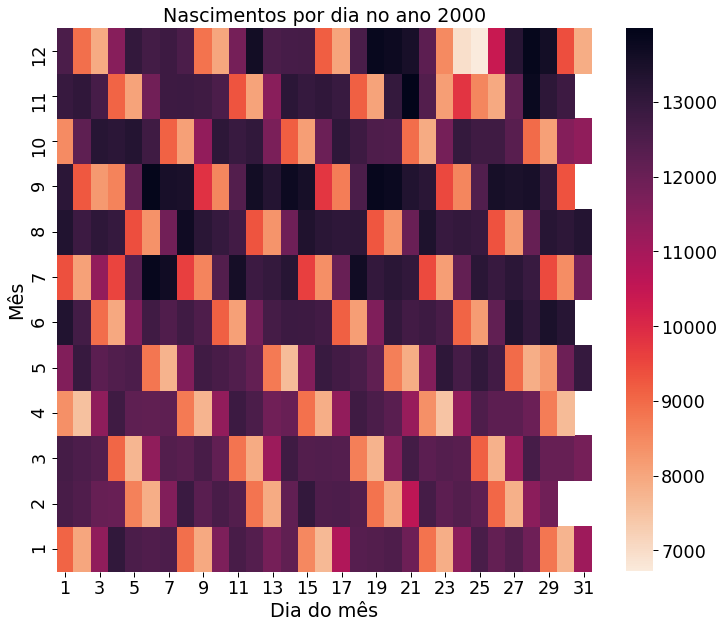

In [4]:
#Criar gráfico e persistir ele. Salvar em JPG
#Heatmap
plt.figure(figsize=(12,10))
sns.set_context('paper',font_scale=2)

mapa_calor = df
mapa_calor = mapa_calor.pivot("Mês","Dia do mês","Nascimentos")
ax = sns.heatmap(mapa_calor, cmap='rocket_r').set(title='Nascimentos por dia no ano 2000')
plt.gca().invert_yaxis()
plt.savefig('Nascimentos2000.png')



#### Parte V
https://github.com/Gartarok/PandasAPI